# PLAYSTORE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\param\Playstore-analysis.csv")
print("playstore data read successfully")

playstore data read successfully


In [3]:
df.shape

(10841, 13)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

# 1. Data clean up – Missing value treatment

In [7]:
#a.Drop records where rating is missing since rating is our target/study variable

df = df.dropna(axis=0, subset=['Rating'])

In [8]:
df.isna().sum().sort_values(ascending=False)

Current Ver       4
Android Ver       3
Content Rating    1
Last Updated      0
Genres            0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [9]:
#b.Check the null values for the Android Ver column.

np.where(df['Android Ver'].isnull())[0]

array([4280, 4308, 9117], dtype=int64)

In [10]:
#b(i)Are all 3 records having the same problem?

df[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#b(ii)Drop the 3rd record i.e. record for “Life Made WIFI …”

df = df.drop(df[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index)

In [12]:
df.isna().sum().sort_values(ascending=False)

Current Ver       4
Android Ver       2
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [13]:
#b(iii)Replace remaining missing values with the mode

type(df['Android Ver'].mode())

pandas.core.series.Series

In [14]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [15]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [16]:
df.isna().sum().sort_values(ascending=False)

Current Ver       4
Android Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [17]:
#c.Current ver – replace with most common value

df = df.fillna(df['Current Ver'].value_counts().index[0])

In [18]:
df.isna().sum().sort_values(ascending=False)

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

# 2. Data clean up- Correcting the data types

In [19]:
#a.Which all variables need to be brought to numeric types?

#No variable is need to be brought to numeric data types.

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
#b.Price variable – remove $ sign and convert to float

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
df['Price'] = df['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
#c.Installs – remove ‘,’ and ‘+’ sign, convert to integer

df['Installs'] = df.Installs.apply(lambda x: x.strip(','))
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

df['Installs'] = df.Installs.apply(lambda x: x.replace(',',''))

df['Installs'] = df['Installs'].astype(int)

In [24]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
#d.Convert all other identified columns to numeric

df['Installs'] = df['Installs'].astype(int)
df['Reviews'] = df['Reviews'].astype(int)
df['Size'] = df['Size'].astype(int)

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

In [27]:
#a.Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
#(i)Are there any such records? Drop if so.

(df['Rating']>5).sum()

0

In [28]:
#b.Reviews should not be more than installs as only those who installed can review the app.
#(i)Are there any such records? Drop if so.

np.where(df['Reviews']>df['Installs'])

(array([2342, 4467, 5539, 6149, 6622, 7598, 9266], dtype=int64),)

In [29]:
df[df["Reviews"]>df["Installs"]] #Condition

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [30]:
df.drop(df[df["Reviews"]>df["Installs"]].index, axis=0, inplace=True)

In [31]:
df.shape

(9359, 13)

# 4. Identify and handle outliers

In [32]:
plt.style.use('dark_background')

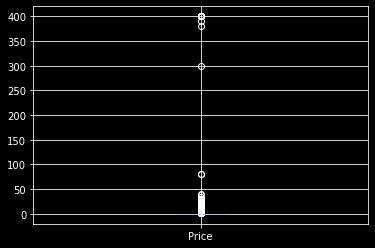

In [33]:
#a.Price column
#(i)Make suitable plot to identify outliers in price

df.boxplot(column=['Price']);

In [34]:
#a(ii)Do you expect apps on the play store to cost $200? Check out these cases

(df['Price']>200).sum()

15

In [35]:
df[df["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [36]:
df.drop(df[df["Price"]>200].index, axis=0, inplace=True)

In [37]:
df.shape

(9344, 13)

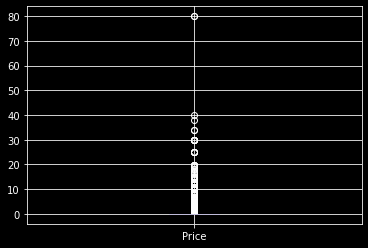

In [38]:
#a(iii)After dropping the useless records, make the suitable plot again to identify outliers

df.boxplot(column=['Price']);

In [39]:
#a(iv)Limit data to records with price < $30

(df['Price']>=30).sum()

6

In [40]:
df[df["Price"]>=30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [41]:
df.drop(df[df["Price"]>=30].index, axis=0, inplace=True)

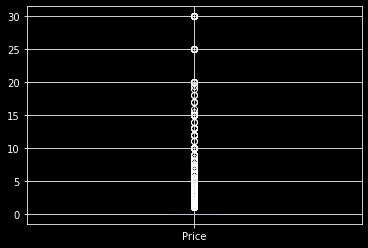

In [42]:
df.boxplot(column=['Price']);

In [43]:
df.shape

(9338, 13)

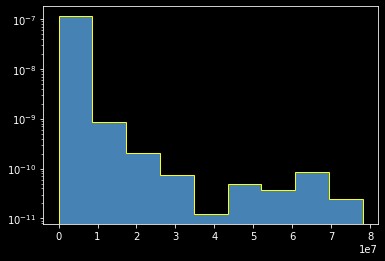

In [45]:
#b.Reviews column
#(i)Make suitable plot

plt.hist(df['Reviews'], bins=9, alpha=1, density=True, histtype='stepfilled', color='steelblue',
        edgecolor='yellow', log=True);

In [46]:
#b(ii)Limit data to apps with < 1 Million reviews

(df['Reviews']>1000000).sum()

704

In [47]:
df[df['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [48]:
df.drop(df[df['Reviews']>1000000].index, axis=0, inplace=True)

In [49]:
df.shape

(8634, 13)

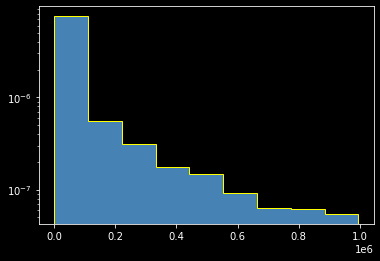

In [50]:
plt.hist(df['Reviews'],bins=9, alpha=1, density=True, histtype='stepfilled', color='steelblue',
        edgecolor='yellow', log=True);

In [51]:
#c.Installs
#(i)What is the 95th percentile of the installs?

np.percentile(df.Installs, 95)

10000000.0

In [52]:
(df['Installs']>np.percentile(df.Installs, 95)).sum()

199

In [53]:
#(ii)Drop records having a value more than the 95th percentile

df.drop(df[df['Installs']>np.percentile(df.Installs, 95)].index, axis=0, inplace=True)

In [54]:
df.shape

(8435, 13)

# Data analysis to answer business questions

Skewness: -1.743427
Kurtosis: 5.153913


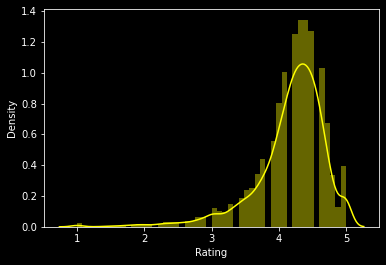

In [55]:
#5.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#(a)How do you explain this?

plt.style.use('dark_background')
sns.distplot(df['Rating'], color="yellow")
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())

In [56]:
print(df.loc[:,"Rating"].mean())
print(df.loc[:,"Rating"].median())
print(df.loc[:,"Rating"].mode()[0])

4.170800237107298
4.3
4.3


In [57]:
#6.What are the top Content Rating values?
#(a)Are there any values with very few records?

df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
#6(b)If yes, drop those as they won’t help in the analysis

df = df.drop(df[df['Content Rating'] == 'Adults only 18+'].index)
df = df.drop(df[df['Content Rating'] == 'Unrated'].index)

In [59]:
df.shape

(8431, 13)

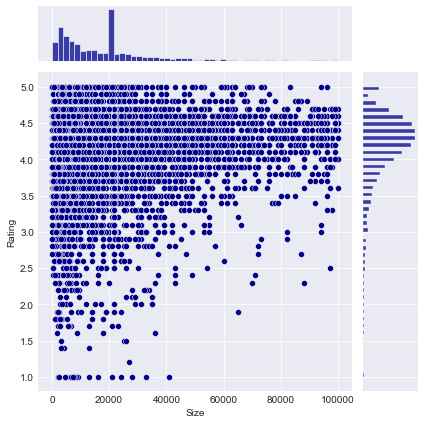

In [60]:
#7.Effect of size on rating
#(a)Make a joinplot to understand the effect of size on rating

plt.style.use('seaborn-darkgrid')
sns.jointplot(x='Size',y='Rating', data=df, color='darkblue');

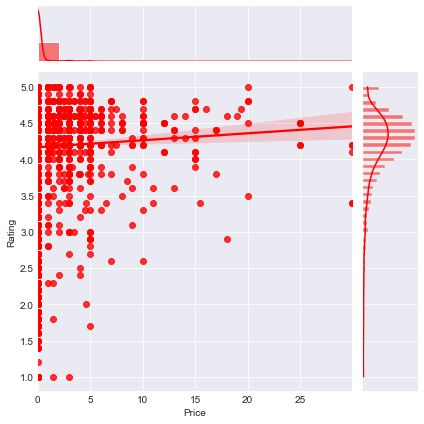

In [61]:
#8.Effect of price on rating
#(a)Make a jointplot (with regression line)

sns.jointplot(x='Price',y='Rating', data=df, color='red', kind='reg');

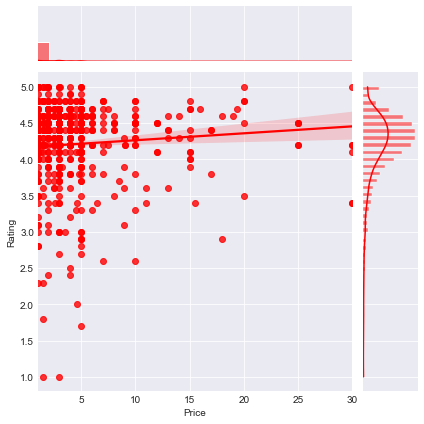

In [62]:
#8(d)Replot the data, this time with only records with price > 0

sns.jointplot(x='Price', y='Rating', xlim=[1,30], data=df, color='red', kind='reg');

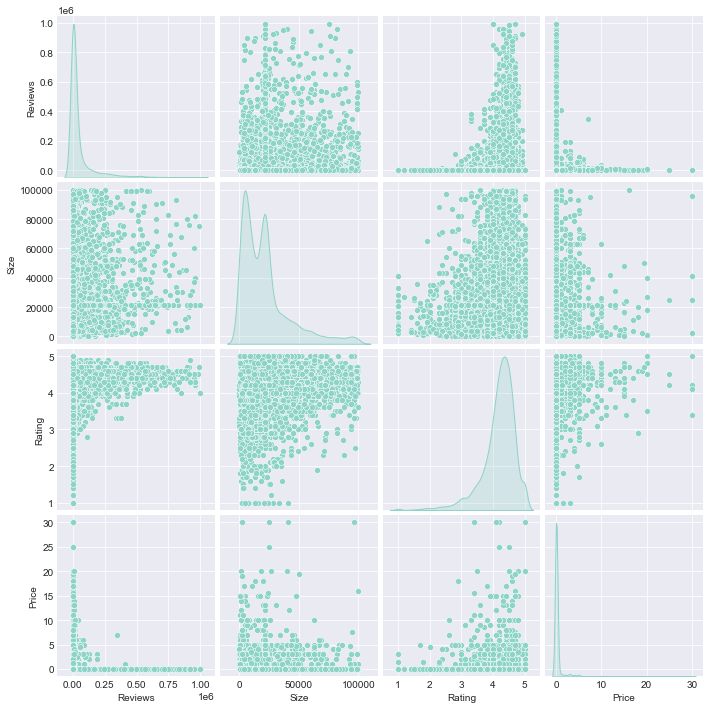

In [63]:
#9.Look at all the numeric interactions together –
#(a)Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

sns.pairplot(df, vars=["Reviews", "Size", "Rating", "Price"], diag_kind = 'kde');

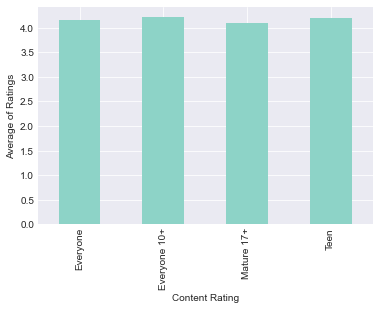

In [64]:
#10.Rating vs. content rating
#Make a bar plot displaying the rating for each content rating

a = df['Rating'].groupby(df['Content Rating']).mean().plot(kind = 'bar')
a.set(xlabel ='Content Rating', ylabel = 'Average of Ratings')
plt.show()

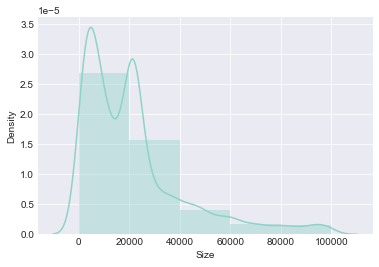

In [65]:
#11.Content rating vs. size vs. rating – 3 variables at a time
#(a)Create 5 buckets (20% records in each) based on Size

sns.distplot(df["Size"], bins=5)
plt.show()

In [66]:
bins = [0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW', 'LOW', 'MED', 'HIGH', 'VERY HIGH'])
pd.pivot_table(df, values='Rating', index= 'Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116465,4.188889,3.951429,4.216129
LOW,4.158147,4.207143,4.129592,4.208511
MED,4.213381,4.245192,4.021705,4.138043
HIGH,4.170334,4.193443,4.155172,4.192000
VERY HIGH,4.185690,4.215702,4.193814,4.244483


In [67]:
#11(b)By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

df.Size.quantile([0.2,0.4,0.6,0.8])

0.2     4600.0
0.4    12000.0
0.6    21516.0
0.8    32000.0
Name: Size, dtype: float64

In [68]:
df.Rating.quantile([0.2,0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [69]:
Size_Buckets = pd.pivot_table(df, values='Rating', index= 'Size_Buckets', columns='Content Rating', 
                              aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.84
LOW,3.8,3.94,3.64,3.80
MED,4.0,4.10,3.70,3.90
HIGH,3.8,4.00,3.90,4.00
VERY HIGH,3.9,4.00,4.00,4.00


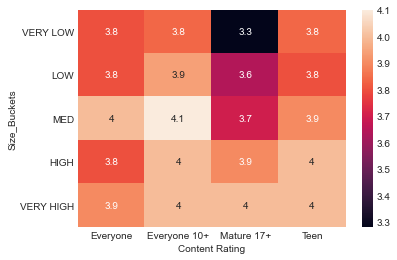

In [70]:
#11(c)Make a heatmap of this
#(i)Annotated

sns.heatmap(Size_Buckets, annot=True)
plt.show()

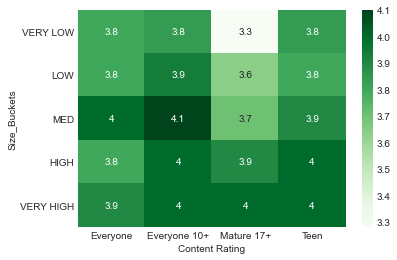

In [71]:
#(ii)Greens color map

sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

In [72]:
#11(d)What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

print(df.Category.value_counts())

FAMILY                 1655
GAME                    818
TOOLS                   671
MEDICAL                 344
FINANCE                 309
LIFESTYLE               303
SPORTS                  301
BUSINESS                292
PERSONALIZATION         292
HEALTH_AND_FITNESS      290
PRODUCTIVITY            282
PHOTOGRAPHY             248
COMMUNICATION           240
NEWS_AND_MAGAZINES      222
SOCIAL                  210
SHOPPING                208
TRAVEL_AND_LOCAL        205
DATING                  195
BOOKS_AND_REFERENCE     171
EDUCATION               147
VIDEO_PLAYERS           135
ENTERTAINMENT           133
MAPS_AND_NAVIGATION     118
FOOD_AND_DRINK          107
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  69
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


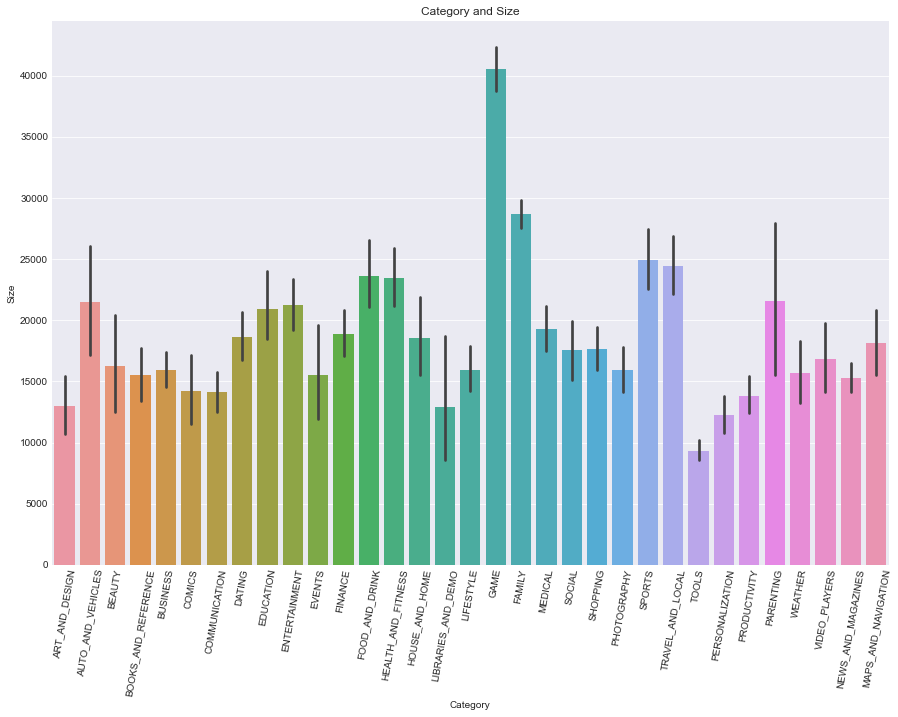

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x= 'Category', y= 'Size')
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Size")
plt.title("Category and Size")
plt.show()

## Final Analysis 

###### So our main motive behind this analysis was to understand what makes an app perform well -

WE can conclude that a single factor can never be enough for an app to perform well, there are always some factors responsible for the performance of an app. Same is with our analysis also, but the most important factor according to our Data Analysis came out to be is Category to which any app belongs, as we can see that the categories with the maximum number of apps are Family, Game, Tools, Medical and Finance which clearly shows user's choice and preferences, or the importance they give to any category.

Some other useful factors that influence performance of apps are Size and Price, as we saw user's rate heavier apps highly while their views(Ratings) regarding lighter apps are scattered. Price on the other hand, is also important factor as we saw there are very less highly priced apps and maximum number of apps are low priced but those some apps with high price were rated highly by users while low priced app ratings are scattered as in the case of Size of an app.